In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training_data/training_data.csv')
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [3]:
df.shape

(1503, 11)

In [4]:
df.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [6]:
df.shape

(1491, 11)

In [7]:
df.isna().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [8]:
df.duplicated().sum()

1080

In [9]:
df.rename(columns = {'Feeling sad or Tearful':'Sad_Tearful',
       'Irritable towards baby & partner':'Irritable', 'Trouble sleeping at night': 'Trouble_Sleeping',
       'Problems concentrating or making decision':'Problems_Focusing',
       'Overeating or loss of appetite': 'Eating_Disorder', 'Feeling anxious': 'Anxious', 'Feeling of guilt':'Guilt', 
       'Problems of bonding with baby':'Problems_Bonding','Suicide attempt':'Suicide_Attempt'}, inplace = True)
df.head()

,Timestamp,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Anxious,Guilt,Problems_Bonding,Suicide_Attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [10]:
palette_5 = ['#001C23', '#003C43', '#135D66', '#77B0AA', '#E3FEF7']
palette_3 = palette_5[1:4]
palette_2 = palette_5[2:4]

def class_plots(col_name, color=None):
    series = df[col_name].value_counts()
    plt.figure(figsize=(10,6))
        
    plt.subplot(1,2,1)
    series.plot(kind="bar", color=color)
    
    plt.subplot(1,2,2)
    series.plot(kind="pie", colors=color)
    
    plt.show()

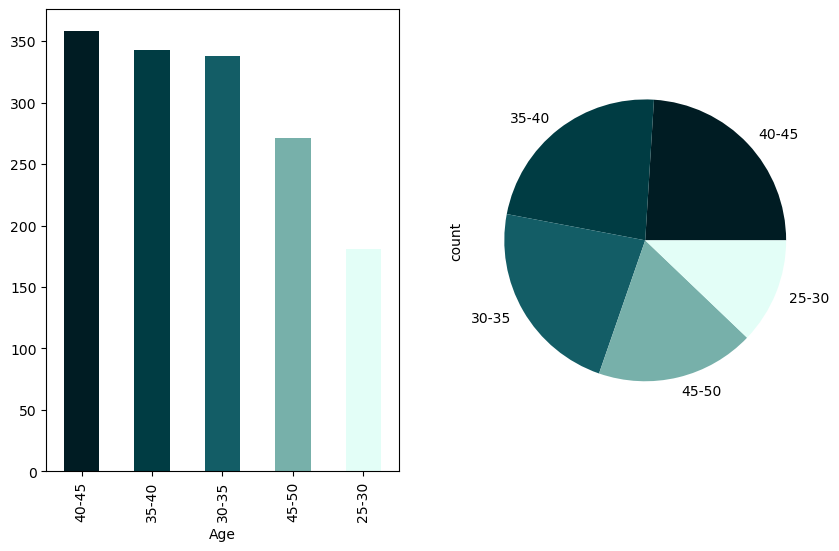

In [11]:
class_plots('Age', palette_5)

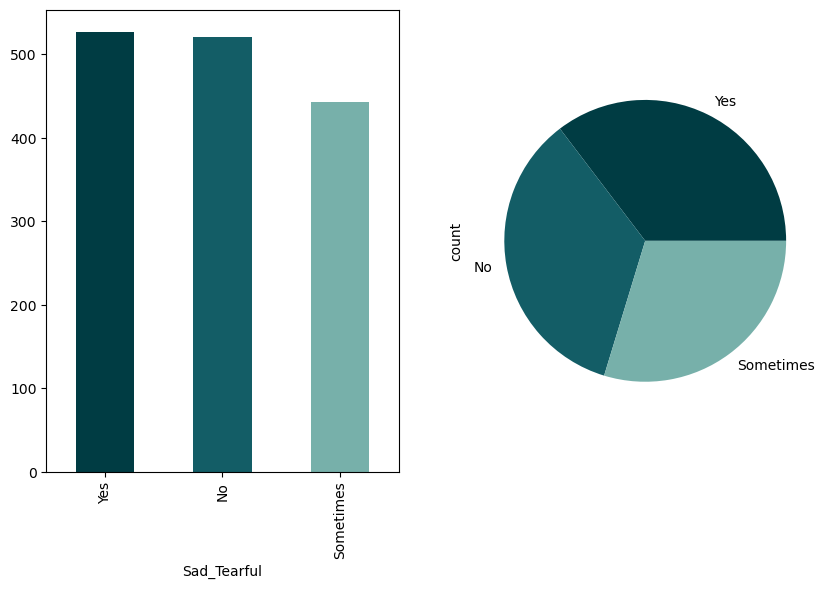

In [12]:
class_plots('Sad_Tearful', palette_3)

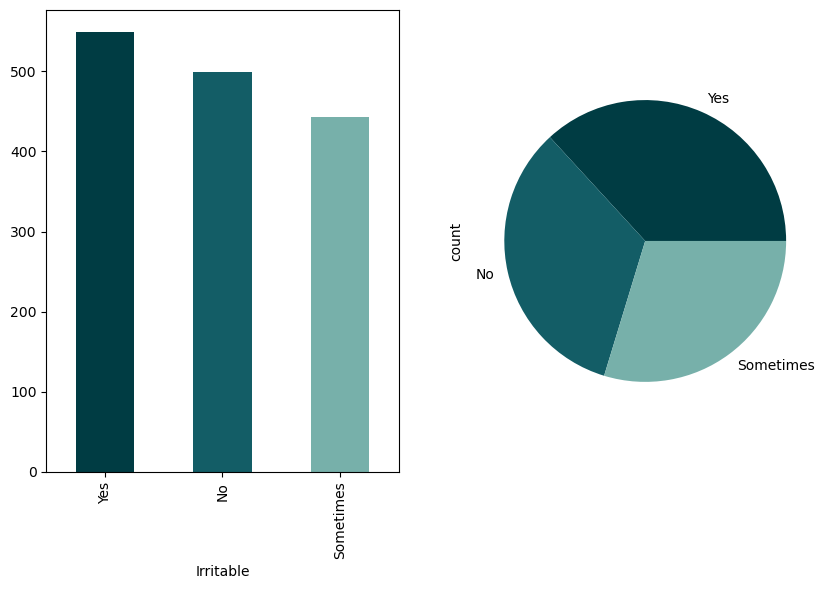

In [13]:
class_plots('Irritable', palette_3)

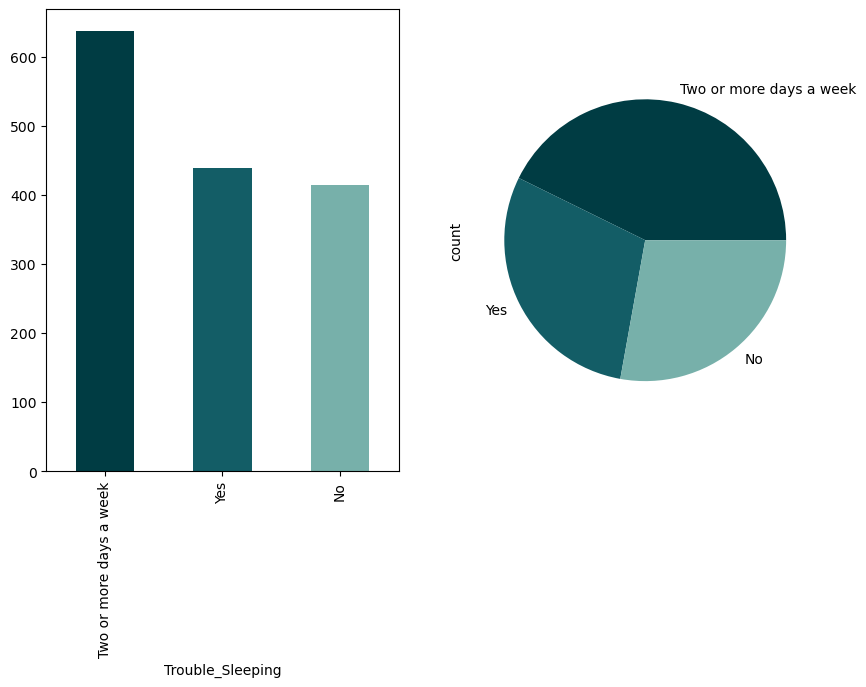

In [14]:
class_plots('Trouble_Sleeping', palette_3)

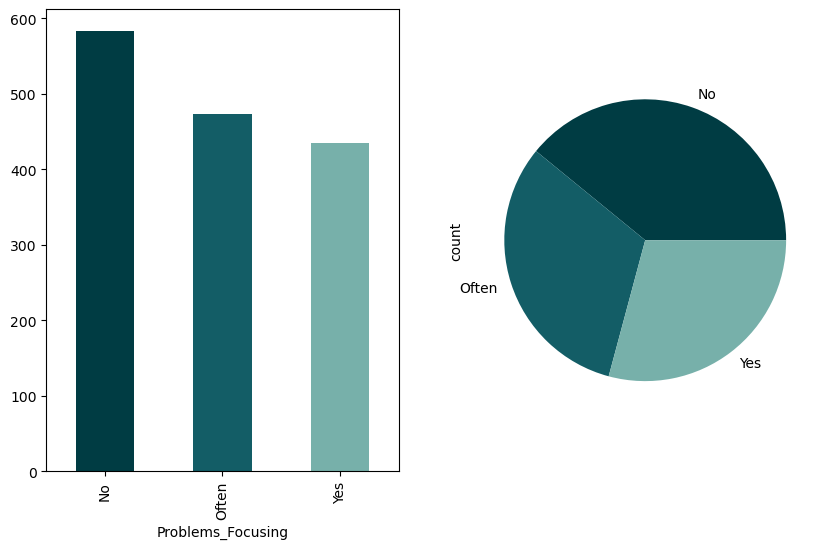

In [15]:
class_plots('Problems_Focusing', palette_3)

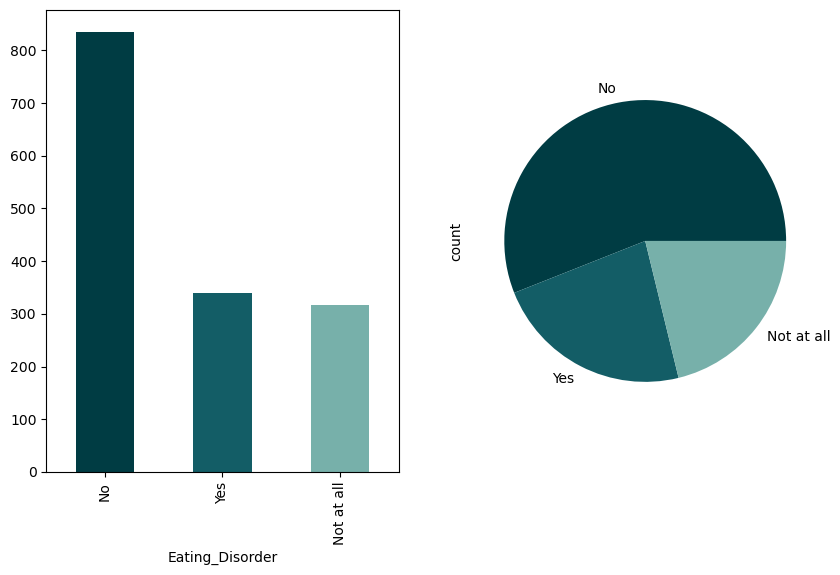

In [16]:
class_plots('Eating_Disorder', palette_3)

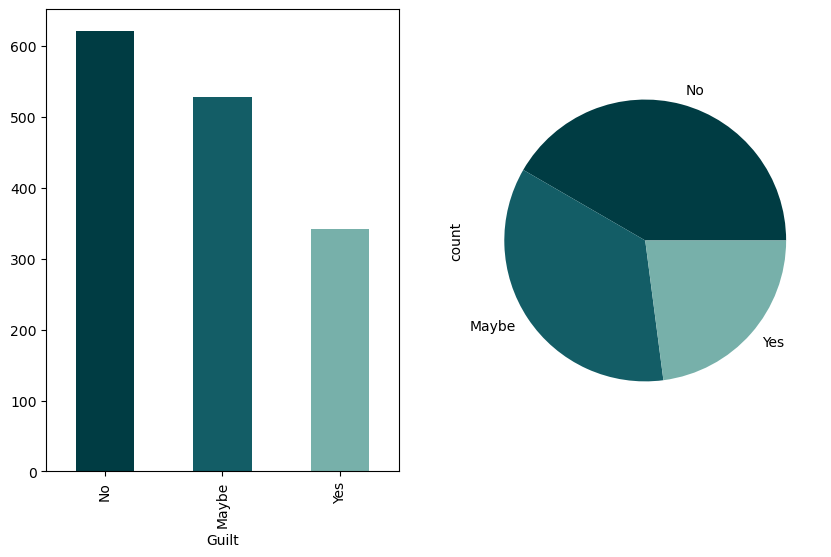

In [17]:
class_plots('Guilt', palette_3)

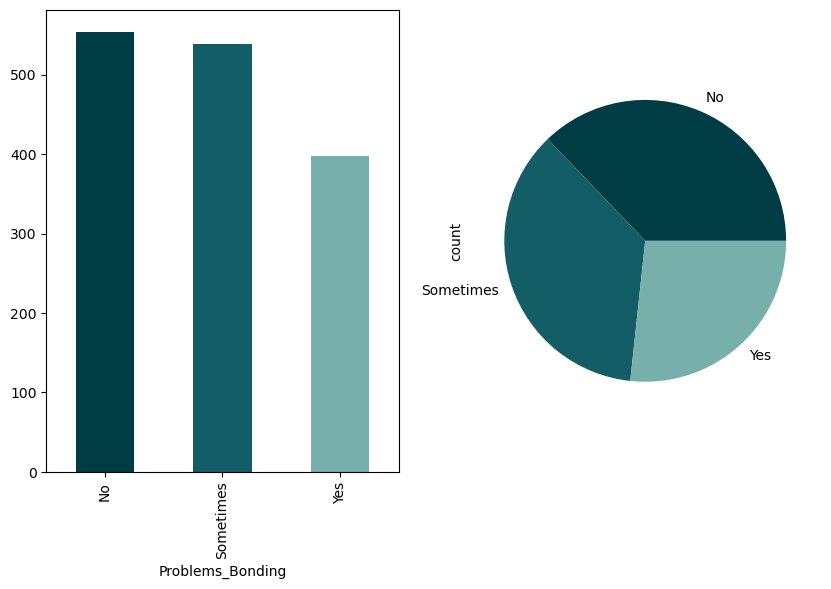

In [18]:
class_plots('Problems_Bonding', palette_3)

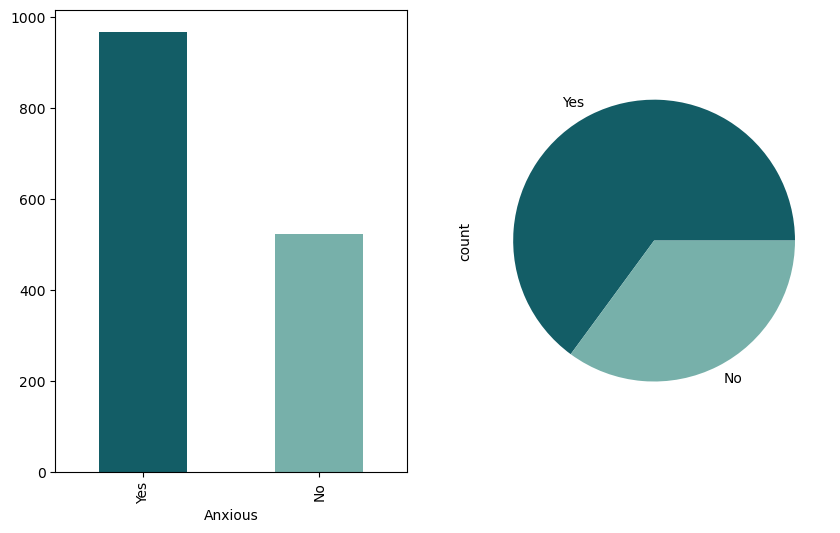

In [19]:
class_plots('Anxious', palette_2)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
y = df['Anxious']
x = df.drop(['Anxious', 'Timestamp'], axis=1)
x

,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Guilt,Problems_Bonding,Suicide_Attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...
1486,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No
1487,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No
1488,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say
1489,25-30,No,Sometimes,Yes,Often,No,No,No,No


In [22]:
def fit_label_encoders(df):
    encoders = list()
    for column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders.append(le)
    return encoders

def fit_target_label_encoder(target):
    le = LabelEncoder()
    target = le.fit_transform(target)
    return le, target

In [23]:
x_encoders = fit_label_encoders(x)
x.head()

,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Guilt,Problems_Bonding,Suicide_Attempt
0,2,2,2,1,2,2,1,2,2
1,3,2,0,0,2,2,2,2,0
2,2,2,0,2,2,2,1,1,0
3,2,2,2,2,2,0,0,0,0
4,3,2,0,1,2,0,1,2,0


In [24]:
y_encoder, y = fit_target_label_encoder(y)
y

array([1, 0, 1, ..., 0, 1, 0])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=123)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=123)

In [27]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    n_leaves = trial.suggest_int('num_leaves', 25,100)
    max_depth = trial.suggest_int("max_depth", 1,10)
    n_estimators = trial.suggest_int("n_estimators", 10,2000)
    r_alpha = trial.suggest_int("reg_alpha", 0.0, 0.1)
    r_lambda = trial.suggest_int("reg_lambda", 0.0, 0.1)
    l_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    subsample =  trial.suggest_float('subsample', 0.5, 1.0)
    lambda_l1 = trial.suggest_int("lambda_l1", 0.0, 4)
    lambda_l2 = trial.suggest_int("lambda_l2", 0.0, 4)
    feature_fraction =  trial.suggest_float('feature_fraction', 0.5, 1.0)

    lgb = LGBMClassifier(
            num_leaves = n_leaves,
            max_depth = max_depth, 
            n_estimators = n_estimators,
            reg_alpha = r_alpha,
            reg_lambda = r_lambda,
            learning_rate = l_rate,
            subsample = subsample,
            lambda_l1 = lambda_l1,
            lambda_l2 = lambda_l2,
            feature_fraction = feature_fraction,
            verbose = -1
        )
    
    lgb.fit(x_train, y_train, eval_set=[(x_val, y_val)])
    
    y_pred_proba = lgb.predict_proba(x_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    return roc_auc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2024-04-13 13:41:13,046] A new study created in memory with name: no-name-27aa327b-340f-40de-90b8-d6a5cc89573f
[I 2024-04-13 13:41:13,150] Trial 0 finished with value: 0.9146222741433022 and parameters: {'num_leaves': 30, 'max_depth': 3, 'n_estimators': 416, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0035464699657734816, 'subsample': 0.5626806881058057, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.8427187561689329}. Best is trial 0 with value: 0.9146222741433022.
[I 2024-04-13 13:41:13,189] Trial 1 finished with value: 0.9451908099688473 and parameters: {'num_leaves': 52, 'max_depth': 8, 'n_estimators': 169, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.007742477910080562, 'subsample': 0.9963636627185906, 'lambda_l1': 4, 'lambda_l2': 2, 'feature_fraction': 0.8271607881949081}. Best is trial 1 with value: 0.9451908099688473.
[I 2024-04-13 13:41:13,386] Trial 2 finished with value: 0.9501557632398754 and parameters: {'num_leaves': 55, 'max_depth': 9, 'n_estimat

In [37]:
trial = study.best_trial
print('ROC_AUC Score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

ROC_AUC Score: 0.9981503115264797
Best hyperparameters: {'num_leaves': 80, 'max_depth': 7, 'n_estimators': 1787, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.05904893508288049, 'subsample': 0.8250204896603014, 'lambda_l1': 0, 'lambda_l2': 2, 'feature_fraction': 0.7146761941816868}


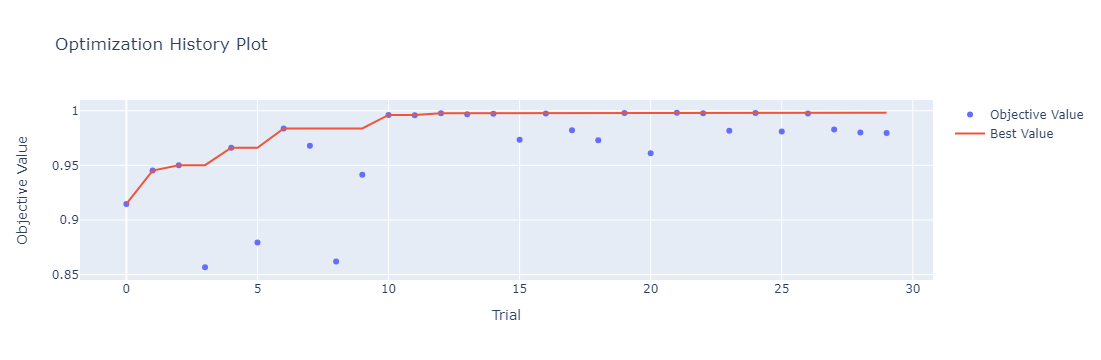

In [38]:
optuna.visualization.plot_optimization_history(study)

In [39]:
lgbm = LGBMClassifier(**trial.params, verbose=-1)
lgbm.fit(x_train, y_train, eval_set=[(x_val, y_val)])

LGBMClassifier(feature_fraction=0.7146761941816868, lambda_l1=0, lambda_l2=2,
               learning_rate=0.05904893508288049, max_depth=7,
               n_estimators=1787, num_leaves=80, reg_alpha=0, reg_lambda=0,
               subsample=0.8250204896603014, verbose=-1)

In [40]:
lgbm.score(x_test, y_test)

0.9630872483221476

In [41]:
y_pred_proba = lgbm.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9962558342309072

In [42]:
data = {
    "Age": "35-40",
    "Sad_Tearful": "Yes",
    "Irritable": "Yes",
    "Trouble_Sleeping": "Yes",
    "Problems_Focusing": "No",
    "Eating_Disorder": "Not at all",
    "Guilt": "Yes",
    "Problems_Bonding": "No",
    "Suicide_Attempt": "Yes"
}

In [43]:
test_df = pd.DataFrame([data])
test_df

,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Guilt,Problems_Bonding,Suicide_Attempt
0,35-40,Yes,Yes,Yes,No,Not at all,Yes,No,Yes


In [44]:
for i, column in enumerate(test_df.columns):
    le = x_encoders[i]
    test_df[column] = le.transform(test_df[column])
test_df

,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Guilt,Problems_Bonding,Suicide_Attempt
0,2,2,2,2,0,1,2,0,2


In [45]:
pred = lgbm.predict(test_df)
pred[0]

0

In [50]:
import os
import shutil

def save_encoders():
    save_dir = 'encoders'
    if os.path.exists(save_dir):
        shutil.rmtree(save_dir)
    os.mkdir(save_dir)
    for i, encoder in enumerate(x_encoders):
        path = os.path.join(save_dir, f"encoder_{i}.npy")
        numpy.save(path, encoder.classes_)
save_encoders()

NameError: name 'numpy' is not defined